In [1]:
#  For sting e changes I made in python files

In [2]:
from config import config
from tqdm import tqdm
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
import pickle
from scipy.interpolate import UnivariateSpline
from constants import pdm_constants
import csv
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)

In [3]:
# Parameters ---
config["general"]["detector"] = "IceCube"
config["general"]["year"] = 9
mass_grid = np.logspace(2, 6, 9) # np.logspace(1, 6, 10)
sv_grid = np.logspace(-26, -21, 9) # 10
angle = config['atmospheric showers']['theta angles']
b = Atm_Shower()
mass_id = 4
sv_id = -1

mass_grid_1 = np.logspace(2, 6, 6)
sv_grid_1 =  np.logspace(-25, -21, 6)

std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot
lw=0.5  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

In [4]:
surface_fluxes = pickle.load(open("../data/surf_store_v1.p", "rb"))
shower = surface_fluxes[20][3] # background fluxes at 20° ----

In [5]:
dm = DM2Nu()

In [6]:
# Flux, Counts, effective are
#limits = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/16_12/data/limits_results_IceCube.pkl','rb'))

limits_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/limits_results_IceCube.pkl','rb'))

limits_com_unsm = pickle.load(open('../data/28_03/unsmeared/limits_results_combined_unsm.pkl', 'rb'))
limits_com_sm = pickle.load(open('../data/28_03/smeared/limits_results_combined_sm.pkl', 'rb'))

limits_pone_unsm = pickle.load(open('../data/29_03/unsmeared/limits_results_POne_unsm.pkl', 'rb'))
limits_pone_sm = pickle.load(open('../data/29_03/smeared/limits_results_POne_sm.pkl', 'rb'))

#pone_signal = pickle.load(open('/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/data/pone_signal.pkl','rb'))

In [7]:
# Limits data Loading 

#cl_lit = np.loadtxt('/home/kruteesh/Desktop/DM_nu_simulation_P-One/Literature/limits_Ice.csv', delimiter=",")
#cl_lit = (cl_lit[cl_lit[:, 0].argsort()])

cl_lit_HE = np.loadtxt('../data/IceCube_HE.csv', delimiter=",")
cl_lit_HE = (cl_lit_HE[cl_lit_HE[:, 0].argsort()])
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
th_cl = (th_cl[th_cl[:, 0].argsort()])
unitarity = np.loadtxt(open('../data/Unitarity_bound.csv'), delimiter = ',')
unitarity = (unitarity[unitarity[:, 0].argsort()])

m_1e4 = np.loadtxt("../data/m_1e4.csv",delimiter=",")
m_1e4 = (m_1e4[m_1e4[:, 0].argsort()])
m_1e2 = np.loadtxt("../data/m_1e2.csv",delimiter=",")
m_1e2 = (m_1e2[m_1e2[:, 0].argsort()])
m_1e6 = np.loadtxt("../data/m_1e6.csv",delimiter=",")
m_1e6 = (m_1e6[m_1e6[:, 0].argsort()])

In [8]:

xx,yy = np.meshgrid(np.log10(mass_grid),np.log10(sv_grid))

xx_1,yy_1 = np.meshgrid(np.log10(mass_grid_1),np.log10(sv_grid_1))


/tmp/ipykernel_21457/3030042762.py:12: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C_ice = ax1.contour(xx,yy, limits_ice[i],linestyles='-', linewidth=2, colors=color_hex[3], levels=[0.9])
/tmp/ipykernel_21457/3030042762.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C_com_sm = ax1.contour(xx,yy, limits_com_sm[i], colors=color_hex[1], linewidth=2, linestyles='dotted', levels=[0.9])


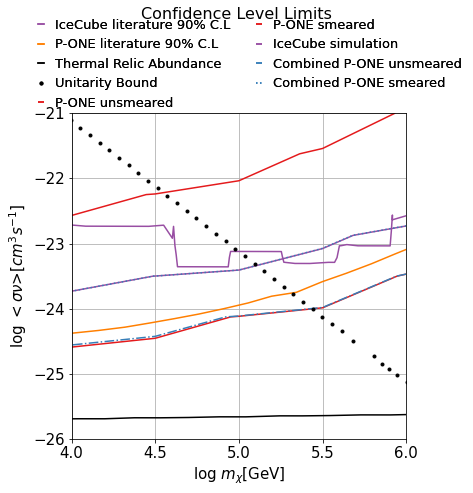

In [12]:
# Limits Comparision ---- TODO: low mass cutoff
#figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
#'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'
p_name = [r'$\nu_{\mu}$', r'$\nu_{e}$', r'$\nu_{\tau}$']
color_hex = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)
for j,i in enumerate(['numu', 'nue', 'nutau']):
    C_pone_unsm = ax1.contour(xx,yy, limits_pone_unsm[i], linestyles='-', colors=color_hex[0], levels=[0.9])
    C_pone_sm = ax1.contour(xx,yy, limits_pone_sm[i], linestyles='-', colors=color_hex[0], levels=[0.9])
    break
    
C_ice = ax1.contour(xx,yy, limits_ice[i],linestyles='-', linewidth=2, colors=color_hex[3], levels=[0.9])
C_com_unsm = ax1.contour(xx,yy, limits_com_unsm[i], linestyles='-.',colors=color_hex[1], levels=[0.9])
C_com_sm = ax1.contour(xx,yy, limits_com_sm[i], colors=color_hex[1], linewidth=2, linestyles='dotted', levels=[0.9])

ax1.plot(np.log10(cl_lit_HE[:, 0]), np.log10(cl_lit_HE[:, 1]), color_hex[3] , label='IceCube literature 90% C.L')
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), color_hex[4], label='P-ONE literature 90% C.L')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'k', 
     label='Thermal Relic Abundance')
ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.k', 
     label='Unitarity Bound')

h_ice,_ = C_ice.legend_elements()
h_com_unsm,_ = C_com_unsm.legend_elements()
h_com_sm,_ = C_com_sm.legend_elements() 
h_pone_unsm,_ = C_pone_unsm.legend_elements()
h_pone_sm,_ = C_pone_sm.legend_elements()
C_s = [C_ice, C_com_unsm, C_com_sm, C_pone_unsm, C_pone_sm]
h_list = [h_ice[0], h_com_unsm[0], h_com_sm[0], h_pone_unsm[0], h_pone_sm[0]]
labels = ['IceCube simulation', 'Combined P-ONE unsmeared', 'Combined P-ONE smeared', 'P-ONE unsmeared', 'P-ONE smeared']
for k in range(0, len(labels)):
    #ax1.clabel(C_s[i], inline=1, fontsize=fontsize)
    C_s[k].collections[0].set_label(labels[k])

h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.2, +1.15),
             ncol=2, fontsize=fontsize-2, handlelength=h_length,
             fancybox=True, frameon=False)
ax1.set_title('Confidence Level Limits ', y = 1.27, fontsize=fontsize+1)
ax1.add_artist(lgd1)
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"$\log$ $m_{\chi}$[GeV]", fontsize=fontsize)
ax1.set_ylabel(r"$\log$ $<\sigma \nu$>[$cm^{3} s^{-1}$]", fontsize=fontsize)
ax1.tick_params(axis = 'both', labelsize=fontsize)
#ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
ax1.set_xlim(4.0, max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)), -21)  # min(np.log10(sv_grid)), -21
ax1.grid()
figure.savefig('../pics/Limits_result_combined.png',bbox_inches='tight', dpi=export_dpi, facecolor='white')

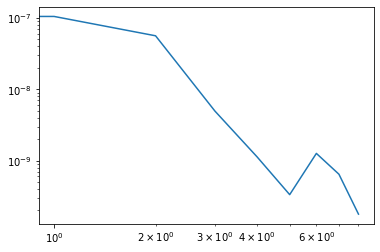

In [10]:
plt.loglog(abs(limits_com_sm['numu']-limits_ice['numu'])[0])